In [1]:
!pip install ktrain

In [2]:
pip install bnltk

  Using cached bnltk-0.7.6-py3-none-any.whl (11 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_

In [3]:
!pip install bnlp-toolkit==4.0.0.dev4

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
     

In [5]:
df = pd.read_excel("/kaggle/input/bangla-ekman-six-emotion-dataset/Dataset.xlsx")

In [6]:
df = df.drop('Racial Biases', axis=1)       
#axis=1 for coloum;
df = df.drop('Hatred Percentage', axis=1)
df = df.drop('Depression Percentage', axis=1)
df = df.drop('Year', axis=1)

In [7]:
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=False,
   remove_email=False,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="",
   replace_with_email="",
   replace_with_number="",
   replace_with_digit="",
   replace_with_punct = ""
)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
for i in range(0,df.shape[0]):
    
    text =  clean_text(df['Text'][i])
    df['Text'][i] = text

In [9]:
rows_to_display = [0, 1, 2]  # Choose the row indices you want to display

for row_index in rows_to_display:
    print(f"Row {row_index} - Original Text: {df.loc[row_index, 'Text']}")
    #print(f"Row {row_index} - Cleaned Text : {df.loc[row_index, 'cleaned_text']}\n")

Row 0 - Original Text: নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভোট বাক্স ভর্তি হলে যা হয়
Row 1 - Original Text: জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রোহী পেট্রল বোমারুদের নির্বাচনী ফলাফল থেকে উচ্ছেদ করেছে, ইহাই জনগনের মূল আনন্দ, জয় বাংলা!
Row 2 - Original Text: ভেজাল নির্বাচন ।


In [10]:
import re


# Define a function to check for special characters
def has_special_characters(Text):
    # Define a pattern to match special characters
    pattern = r'[\&\#\$\~\%\^\*\[\]\{\}]'
    # Use re.search() to check if the pattern is found in the text
    if re.search(pattern, Text):
        return True
    else:
        return False

# Apply the function to the 'Text' column to create a boolean mask
df['has_special_chars'] = df['Text'].apply(has_special_characters)

# Print rows where special characters are present
rows_with_special_chars = df[df['has_special_chars']]
print("Rows with Special Characters:")
print(rows_with_special_chars)


Rows with Special Characters:
          SL   Emotion                                               Text  \
23        24     happy  ভাল নির্বাচনে 100 % ভোটারদের উপস্থিতি থাকলে আর...   
99       100     happy         ১০০% খাটি কথা, হাজার কথার এক কথা। ধন্যবাদ।   
406      407  surprise  আওয়ামীলীগ সরকারের কর্মকাণ্ডে জনগণ ১০০% সন্তুষ...   
499      500     happy  নাইট শিফটে ভোটের বাক্স ভরেও মাত্র ৯০%? অবিলম্ব...   
509      510   disgust  আমার ভোটও আমি দিতে পারি নাই !! সুষ্টভাবে কোন র...   
...      ...       ...                                                ...   
35102  35103   disgust  এটাকে ৮০% জনতার ভোট আওয়ামীলীগের পক্ষে মনে না ...   
35543  35544      fear  আসলে হানিফ দাদার ভাষায় ইসি যে আওয়ামী লিগের প...   
35641  35642     happy  মুক্তি কে জিগাছ করা হোক কে বাঙ্গছে,,,,,,,তার ম...   
35767  35768  surprise  ৬৪% নারী কর্মী দালালদের টাকা দিয়ে মধ্যপ্রাচ্য...   
35924  35925  surprise  ৬৪% নারী কর্মী দালালদের টাকা দিয়ে মধ্যপ্রাচ্য...   

       has_special_chars  
23                

In [11]:
df

,SL,Emotion,Text,has_special_chars
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,False
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,False
2,3,angry,ভেজাল নির্বাচন ।,False
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,False
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",False
...,...,...,...,...
35995,35996,surprise,ভারতের মতো একটা বিশাল দেশে এত অঙ্গরাজ্য যে সব ...,False
35996,35997,surprise,"২৪, ৫০, এমনকি কারো কারো মতে ৬০ জন।",False
35997,35998,surprise,এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন্...,False
35998,35999,surprise,"ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখা, উৎস...",False


## LIST FOR STOP WORDS

In [12]:
from bnlp import BengaliCorpus as corpus
stop_words=set(corpus.stopwords)

In [13]:
size_of_set = len(stop_words)
size_of_set
stop_words

{'অতএব',
 'অথচ',
 'অথবা',
 'অনুযায়ী',
 'অনেক',
 'অনেকে',
 'অনেকেই',
 'অন্তত',
 'অন্য',
 'অবধি',
 'অবশ্য',
 'অর্থাত',
 'আই',
 'আগামী',
 'আগে',
 'আগেই',
 'আছে',
 'আজ',
 'আদ্যভাগে',
 'আপনার',
 'আপনি',
 'আবার',
 'আমরা',
 'আমাকে',
 'আমাদের',
 'আমার',
 'আমি',
 'আর',
 'আরও',
 'ই',
 'ইত্যাদি',
 'ইহা',
 'উচিত',
 'উত্তর',
 'উনি',
 'উপর',
 'উপরে',
 'এ',
 'এঁদের',
 'এঁরা',
 'এই',
 'একই',
 'একটি',
 'একবার',
 'একে',
 'এক্',
 'এখন',
 'এখনও',
 'এখানে',
 'এখানেই',
 'এটা',
 'এটাই',
 'এটি',
 'এত',
 'এতটাই',
 'এতে',
 'এদের',
 'এব',
 'এবং',
 'এবার',
 'এমন',
 'এমনকী',
 'এমনি',
 'এর',
 'এরা',
 'এল',
 'এস',
 'এসে',
 'ঐ',
 'ও',
 'ওঁদের',
 'ওঁর',
 'ওঁরা',
 'ওই',
 'ওকে',
 'ওখানে',
 'ওদের',
 'ওর',
 'ওরা',
 'কখনও',
 'কত',
 'কবে',
 'কমনে',
 'কয়েক',
 'কয়েকটি',
 'করছে',
 'করছেন',
 'করতে',
 'করবে',
 'করবেন',
 'করলে',
 'করলেন',
 'করা',
 'করাই',
 'করায়',
 'করার',
 'করি',
 'করিতে',
 'করিয়া',
 'করিয়ে',
 'করে',
 'করেই',
 'করেছিলেন',
 'করেছে',
 'করেছেন',
 'করেন',
 'কাউকে',
 'কাছ',
 'কাছে',
 'কাজ',
 'কাজে',
 'কারও',
 '

In [14]:
stop_words.remove( 'উত্তর')

In [15]:
stop_words.remove( 'ঠিক')
stop_words.remove(  'না')
stop_words.remove( 'নাই')
stop_words.remove( 'নেই')
stop_words.remove( 'পক্ষে')
stop_words.remove( 'প্রথম')
stop_words.remove( 'প্রাথমিক')
stop_words.remove( 'বক্তব্য')
stop_words.remove( 'হয়নি')
stop_words.remove( 'ছাড়া')
stop_words.remove( 'বাদে')

In [16]:
stop_words.remove('নয়')

In [17]:
stop_words

{'অতএব',
 'অথচ',
 'অথবা',
 'অনুযায়ী',
 'অনেক',
 'অনেকে',
 'অনেকেই',
 'অন্তত',
 'অন্য',
 'অবধি',
 'অবশ্য',
 'অর্থাত',
 'আই',
 'আগামী',
 'আগে',
 'আগেই',
 'আছে',
 'আজ',
 'আদ্যভাগে',
 'আপনার',
 'আপনি',
 'আবার',
 'আমরা',
 'আমাকে',
 'আমাদের',
 'আমার',
 'আমি',
 'আর',
 'আরও',
 'ই',
 'ইত্যাদি',
 'ইহা',
 'উচিত',
 'উনি',
 'উপর',
 'উপরে',
 'এ',
 'এঁদের',
 'এঁরা',
 'এই',
 'একই',
 'একটি',
 'একবার',
 'একে',
 'এক্',
 'এখন',
 'এখনও',
 'এখানে',
 'এখানেই',
 'এটা',
 'এটাই',
 'এটি',
 'এত',
 'এতটাই',
 'এতে',
 'এদের',
 'এব',
 'এবং',
 'এবার',
 'এমন',
 'এমনকী',
 'এমনি',
 'এর',
 'এরা',
 'এল',
 'এস',
 'এসে',
 'ঐ',
 'ও',
 'ওঁদের',
 'ওঁর',
 'ওঁরা',
 'ওই',
 'ওকে',
 'ওখানে',
 'ওদের',
 'ওর',
 'ওরা',
 'কখনও',
 'কত',
 'কবে',
 'কমনে',
 'কয়েক',
 'কয়েকটি',
 'করছে',
 'করছেন',
 'করতে',
 'করবে',
 'করবেন',
 'করলে',
 'করলেন',
 'করা',
 'করাই',
 'করায়',
 'করার',
 'করি',
 'করিতে',
 'করিয়া',
 'করিয়ে',
 'করে',
 'করেই',
 'করেছিলেন',
 'করেছে',
 'করেছেন',
 'করেন',
 'কাউকে',
 'কাছ',
 'কাছে',
 'কাজ',
 'কাজে',
 'কারও',
 'কারণ',
 'ক

In [18]:
size_of_set
size_of_set = len(stop_words)


In [19]:
from bnlp import NLTKTokenizer

bnltk = NLTKTokenizer()

def tokenize_text(cleaned_text):
    word_tokens = bnltk.word_tokenize(cleaned_text)
    sentence_tokens = bnltk.sentence_tokenize(cleaned_text)
    return word_tokens, sentence_tokens

# Apply tokenization to the 'Text' column
df[['word_token', 'sentence_tokens']] = df['Text'].apply(tokenize_text).apply(pd.Series)

# Print the tokenized data for a few specific rows
rows_to_display = [0, 1, 2,3,4]  # Choose the row indices you want to display

for row_index in rows_to_display:
    print(f"Row {row_index} - Original Text: {df.loc[row_index, 'Text']}")
    print(f"Row {row_index} - Word Tokens: {df.loc[row_index, 'word_token']}")
    print(f"Row {row_index} - Sentence Tokens: {df.loc[row_index, 'sentence_tokens']}\n")
     

Row 0 - Original Text: নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভোট বাক্স ভর্তি হলে যা হয়
Row 0 - Word Tokens: ['নির্বাচনের', 'আগের', 'রাতে', 'সুষ্টু', 'শান্তিপূর্ণ', 'ভাবে', 'ভোট', 'বাক্স', 'ভর্তি', 'হলে', 'যা', 'হয়']
Row 0 - Sentence Tokens: ['নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভোট বাক্স ভর্তি হলে যা হয়']

Row 1 - Original Text: জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রোহী পেট্রল বোমারুদের নির্বাচনী ফলাফল থেকে উচ্ছেদ করেছে, ইহাই জনগনের মূল আনন্দ, জয় বাংলা!
Row 1 - Word Tokens: ['জনগণ', 'মনের', 'আনন্দে', 'নিজেদের', 'ভোট', 'কাস্ট', 'করে', 'দেশদ্রোহী', 'পেট্রল', 'বোমারুদের', 'নির্বাচনী', 'ফলাফল', 'থেকে', 'উচ্ছেদ', 'করেছে', ',', 'ইহাই', 'জনগনের', 'মূল', 'আনন্দ', ',', 'জয়', 'বাংলা', '!']
Row 1 - Sentence Tokens: ['জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রোহী পেট্রল বোমারুদের নির্বাচনী ফলাফল থেকে উচ্ছেদ করেছে, ইহাই জনগনের মূল আনন্দ, জয় বাংলা!']

Row 2 - Original Text: ভেজাল নির্বাচন ।
Row 2 - Word Tokens: ['ভেজাল', 'নির্বাচন', '।']
Row 2 - Sentence Tokens: ['ভেজ

In [20]:
import nltk
from collections import Counter
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') # For part-of-speech tagging (optional)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [21]:
tokenized_words_bengali = []
for sentence in df['Text']:
    tokenized_words_bengali.extend(nltk.word_tokenize(sentence))

# Count word frequencies
word_freq_bengali = Counter(tokenized_words_bengali)

# Print the most frequent words
most_common_words_bengali = word_freq_bengali.most_common(20)  
print("Most frequent words in Bengali:")
for word, frequency in most_common_words_bengali:
    print(f"{word}: {frequency} times")

Most frequent words in Bengali:
,: 18325 times
?: 10025 times
!: 8680 times
না: 6553 times
করে: 5431 times
কি: 4671 times
এই: 4569 times
আর: 4266 times
।: 3717 times
ও: 3190 times
করা: 2760 times
...: 2738 times
যে: 2647 times
থেকে: 2462 times
কোন: 2450 times
জন্য: 2448 times
হবে: 2253 times
করতে: 2200 times
কথা: 2119 times
হয়: 2046 times


In [22]:
df

,SL,Emotion,Text,has_special_chars,word_token,sentence_tokens
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,False,"[নির্বাচনের, আগের, রাতে, সুষ্টু, শান্তিপূর্ণ, ...",[নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,False,"[জনগণ, মনের, আনন্দে, নিজেদের, ভোট, কাস্ট, করে,...",[জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্র...
2,3,angry,ভেজাল নির্বাচন ।,False,"[ভেজাল, নির্বাচন, ।]",[ভেজাল নির্বাচন ।]
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,False,"[বিএনপি, ও, রাজাকার, সমর্থকরা, হেরে, গেলে, দেশ...",[বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",False,"[সূক্ষ্ম, কারচুপি, বলে, এতদিন, একটা, কথার, কথা...","[সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, ..."
...,...,...,...,...,...,...
35995,35996,surprise,ভারতের মতো একটা বিশাল দেশে এত অঙ্গরাজ্য যে সব ...,False,"[ভারতের, মতো, একটা, বিশাল, দেশে, এত, অঙ্গরাজ্য...",[ভারতের মতো একটা বিশাল দেশে এত অঙ্গরাজ্য যে সব...
35996,35997,surprise,"২৪, ৫০, এমনকি কারো কারো মতে ৬০ জন।",False,"[২৪, ,, ৫০, ,, এমনকি, কারো, কারো, মতে, ৬০, জন, ।]","[২৪, ৫০, এমনকি কারো কারো মতে ৬০ জন।]"
35997,35998,surprise,এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন্...,False,"[এদের, মধ্য, থেকে, ২৭, জনকে, রাজা, বিয়ে, দিয়...",[এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন...
35998,35999,surprise,"ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখা, উৎস...",False,"[ওয়াকফের, শাব্দিক, অর্থ, কোনো, কিছু, আটকে, রা...","[ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখা, উৎ..."


In [23]:
df['Emotion'].value_counts()

Emotion
disgust     6000
angry       6000
happy       6000
surprise    6000
fear        6000
sad         6000
Name: count, dtype: int64

In [24]:
longest_string = max(df["Text"], key=len)
print(len(longest_string))

3700


In [25]:
def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [26]:
df['Text'] = [remove_stop_words(word_token) for word_token in df['word_token'].tolist()]

In [27]:
df

,SL,Emotion,Text,has_special_chars,word_token,sentence_tokens
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভোট বা...,False,"[নির্বাচনের, আগের, রাতে, সুষ্টু, শান্তিপূর্ণ, ...",[নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ...
1,2,disgust,জনগণ মনের আনন্দে ভোট কাস্ট দেশদ্রোহী পেট্রল বো...,False,"[জনগণ, মনের, আনন্দে, নিজেদের, ভোট, কাস্ট, করে,...",[জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্র...
2,3,angry,ভেজাল নির্বাচন ।,False,"[ভেজাল, নির্বাচন, ।]",[ভেজাল নির্বাচন ।]
3,4,happy,"বিএনপি রাজাকার সমর্থকরা হেরে দেশের ভাল , আমিও ...",False,"[বিএনপি, ও, রাজাকার, সমর্থকরা, হেরে, গেলে, দেশ...",[বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্...
4,5,angry,"সূক্ষ্ম কারচুপি এতদিন একটা কথার কথা , বাস্তব র...",False,"[সূক্ষ্ম, কারচুপি, বলে, এতদিন, একটা, কথার, কথা...","[সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, ..."
...,...,...,...,...,...,...
35995,35996,surprise,ভারতের একটা বিশাল দেশে অঙ্গরাজ্য সময়ই না রাজ্...,False,"[ভারতের, মতো, একটা, বিশাল, দেশে, এত, অঙ্গরাজ্য...",[ভারতের মতো একটা বিশাল দেশে এত অঙ্গরাজ্য যে সব...
35996,35997,surprise,"২৪ , ৫০ , এমনকি কারো কারো মতে ৬০ ।",False,"[২৪, ,, ৫০, ,, এমনকি, কারো, কারো, মতে, ৬০, জন, ।]","[২৪, ৫০, এমনকি কারো কারো মতে ৬০ জন।]"
35997,35998,surprise,মধ্য ২৭ রাজা বিয়ে দিয়েছিল চন্দ্রের ।,False,"[এদের, মধ্য, থেকে, ২৭, জনকে, রাজা, বিয়ে, দিয়...",[এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন...
35998,35999,surprise,"ওয়াকফের শাব্দিক অর্থ আটকে , উৎসর্গ । পারিভাষি...",False,"[ওয়াকফের, শাব্দিক, অর্থ, কোনো, কিছু, আটকে, রা...","[ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখা, উৎ..."


In [28]:
longest_string = max(df["Text"], key=len)
print(len(longest_string))

3388


In [29]:
text = df['Text'].values.tolist()
label = df['Emotion'].tolist()

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text , label, test_size=0.2, random_state=42)

In [31]:
import ktrain
from ktrain import text
MODEL_NAME = 'xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [32]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 13
	95percentile : 35
	99percentile : 55


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 13
	95percentile : 34
	99percentile : 55


In [33]:
model = t.get_classifier()

In [34]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=12)

In [35]:
history = learner.fit_onecycle(2e-5, 5)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/5
2400/2400 [==============================] - 2241s 922ms/step - loss: 1.6551 - accuracy: 0.3001 - val_loss: 1.3661 - val_accuracy: 0.4761
Epoch 2/5
2400/2400 [==============================] - 2209s 921ms/step - loss: 1.2994 - accuracy: 0.5128 - val_loss: 0.9724 - val_accuracy: 0.6596
Epoch 3/5
2400/2400 [==============================] - 2208s 920ms/step - loss: 0.8844 - accuracy: 0.6957 - val_loss: 0.7321 - val_accuracy: 0.7665
Epoch 4/5
2400/2400 [==============================] - 2209s 920ms/step - loss: 0.5605 - accuracy: 0.8138 - val_loss: 0.5665 - val_accuracy: 0.8331
Epoch 5/5
2400/2400 [==============================] - 2209s 921ms/step - loss: 0.3650 - accuracy: 0.8809 - val_loss: 0.5415 - val_accuracy: 0.8431


In [36]:
learner.validate(class_names=t.get_classes()) 

225/225 [==============================] - 155s 675ms/step
              precision    recall  f1-score   support

       angry       0.83      0.83      0.83      1226
     disgust       0.83      0.87      0.85      1188
        fear       0.89      0.90      0.89      1129
       happy       0.88      0.87      0.88      1246
         sad       0.76      0.69      0.72      1244
    surprise       0.87      0.90      0.88      1167

    accuracy                           0.84      7200
   macro avg       0.84      0.84      0.84      7200
weighted avg       0.84      0.84      0.84      7200



array([[1015,   62,   29,   23,   75,   22],
       [  53, 1039,   10,   21,   45,   20],
       [  23,   13, 1020,    9,   47,   17],
       [  23,   13,   11, 1085,   74,   40],
       [  93,  100,   64,   68,  862,   57],
       [  19,   25,   17,   26,   31, 1049]])

In [37]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend() 

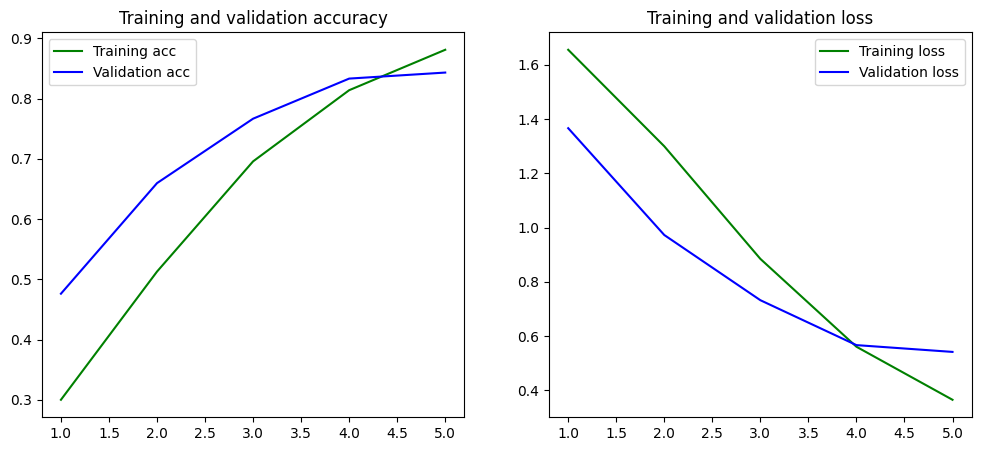

In [38]:
PlotGraph(history)